# Introduction

Source data : https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

References : https://www.kaggle.com/code/moatazbellahahmed/stores-sales-prediction-eda 

## Objectives

1. Standard Data Explarotary
  * Statistical Summary
  * Univariate Analysis
  * Multivariate Analysis

2.  Deep-dive Data Exploratory
  * How the growth of sales, product available on promotion and oil price?
  * How the correlation between sales, onpromotion and oilprice in monthly basis?
  * How the day type affect sales ?
  * Who is the top 10 customer who bought product the largest ?
  * How the growth of the sales in each city ?

3. Model of Forecasting Sales

4. Business Solutions

Notes : In this file is for modelling random forest only. For EDA and other modelling, please kindly check to another file in this git.

# Import Libraries

In [89]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Data Preparation

## Import Datasets

In [2]:
event = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
submission = pd.read_csv('sample_submission.csv')
stores = pd.read_csv('stores.csv')
trans = pd.read_csv('transactions.csv')
train_data = pd.read_csv('train.csv')

## Load and Data Description

#### Event Data

In [3]:
#Lookup event data
event.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
#Dheck detail event data
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


#### Oil Price Data

In [5]:
#Lookup oil data
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
#Dheck detail oil data
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#### Submission Data

In [7]:
#lookup submission data
submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [8]:
#Check detail submisson data
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


#### Stores

In [9]:
#lookup stores data
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
#Check detail stores data
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


#### Transaction

In [11]:
#lookup transaction data
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
#Check detail transaction data
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


#### Train Data

In [13]:
#lookup train data
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [14]:
#Check detail transaction data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


## Data Cleansing

### Handling Missing Value

#### Event Data

In [15]:
# Finding missing value null in event data #
event.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

There's no missing value in event data which is good!

#### Oil Price Data

In [16]:
# Finding missing value null in oil data #
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

Because of this is the historical price of oil, it would be better if null values same as the mean of the the oil price, not delete the data. Because the Ecuador is an oil-dependent country.

Notes :The null values will be handled after merge data

#### Submission Data

In [17]:
# Finding missing value null in submission data #
submission.isna().sum()

id       0
sales    0
dtype: int64

There's no missing value in submission data which is good!

#### Transaction Data

In [18]:
# Finding missing value null in transaction data #
trans.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

There's no missing value in transaction data which is good!

#### Train Data

In [19]:
# Finding missing value null in transaction data #
train_data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

There's no missing value in train data which is good!

### Handling Duplicated Value

#### Event Data

In [20]:
# Check data duplicate
event.duplicated().sum()

0

There's no duplicated data, which is good.

#### Oil Price Data

In [21]:
# Check data duplicate
oil.duplicated().sum()

0

There's no duplicated data, which is good.

#### Submission Data

In [22]:
# Check data duplicate
submission.duplicated().sum()

0

There's no duplicated data, which is good.

#### Transaction Data

In [23]:
# Check data duplicate
submission.duplicated().sum()

0

There's no duplicated data, which is good.

#### Train Data

In [24]:
# Check data duplicate
train_data.duplicated().sum()

0

There's no duplicated data, which is good.

## Data Manipulation

### Lookup Date Range of All Data

In [25]:
# Lookup the range date of transaction #
trans["date"].sort_values(ascending=False)

83487    2017-08-15
83446    2017-08-15
83458    2017-08-15
83457    2017-08-15
83456    2017-08-15
            ...    
30       2013-01-02
29       2013-01-02
28       2013-01-02
27       2013-01-02
0        2013-01-01
Name: date, Length: 83488, dtype: object

In [26]:
# Lookup the range date of event #
event["date"].sort_values(ascending=False)

349    2017-12-26
348    2017-12-25
347    2017-12-24
346    2017-12-23
345    2017-12-22
          ...    
4      2012-04-21
3      2012-04-14
2      2012-04-12
1      2012-04-01
0      2012-03-02
Name: date, Length: 350, dtype: object

In [27]:
# Lookup the range date of oil price #
oil["date"].sort_values(ascending=False)

1217    2017-08-31
1216    2017-08-30
1215    2017-08-29
1214    2017-08-28
1213    2017-08-25
           ...    
4       2013-01-07
3       2013-01-04
2       2013-01-03
1       2013-01-02
0       2013-01-01
Name: date, Length: 1218, dtype: object

In [28]:
# Lookup the range date of train data #
train_data["date"].sort_values(ascending=False)

3000887    2017-08-15
2999703    2017-08-15
2999692    2017-08-15
2999693    2017-08-15
2999694    2017-08-15
              ...    
1192       2013-01-01
1193       2013-01-01
1194       2013-01-01
1195       2013-01-01
0          2013-01-01
Name: date, Length: 3000888, dtype: object

From join data we know that : 
* transaction start from Jan 1, 2013 till Aug 15, 2017.
* Event data start from Mar 2, 2012 till Dec 26, 2017
* oil price data start form Jan 1, 2013 till Aug 31, 2017
* train data start from Jan 1, 2013 till Aug 15, 2017


Observation :
The data that will be used in resulting the forecasting is data with range Jan 1, 2013 till 15 Aug, 2017. Therefore, need to filter the data of event data, oil price data in the range of date Jan 1, 2013 till 31 Jul 2017.


### Filter Range Date of Data

#### For Data Train (in formulating the forecasting Machine Learning - including data train, data validation and data test)

In [29]:
event_train = event[(event['date'] >= '2013-01-01') & (event['date'] <= '2017-07-31')]
oil_train = oil[(oil['date'] >= '2013-01-01') & (oil['date'] <= '2017-07-31')]
train_data = train_data[(train_data['date'] >= '2013-01-01') & (train_data['date'] <= '2017-07-31')]

#### For Data Test Production (using for testing the sales using the forecasting machine learning)

In [30]:
event_prod = event[(event['date'] >= '2017-08-16') & (event['date'] <= '2017-08-31')]
oil_prod = oil[(oil['date'] >= '2017-08-16') & (oil['date'] <= '2017-08-31')]

### Merge Data Frame

From the range of the date, we know that here are several data in range date from Jan 1, 2013 till Aug 15, 2017 that can be used in formulating the forecast using machine learning.
- Event train 
- oil train
- store_trans
- train_data 

From the data we can merge data of oil price, event_train, and train data using primary key = 'date'

In [31]:
# Merge data with the same id of primary key using join dataframe #
train_stores = pd.merge(train_data,stores,on = 'store_nbr')
train_stores.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [32]:
# Merge data with the same id of primary key using join dataframe 
train_event = train_stores.merge(event_train,how='left', left_on='date', right_on='date')
train_event

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027613,2974153,2017-07-31,9,POULTRY,470.513,1,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
3027614,2974154,2017-07-31,9,PREPARED FOODS,61.940,0,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
3027615,2974155,2017-07-31,9,PRODUCE,1517.552,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
3027616,2974156,2017-07-31,9,SCHOOL AND OFFICE SUPPLIES,56.000,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN


In [33]:
# Merge data with the same id of primary key using join dataframe 
dataset = train_event.merge(oil_train,how='left', left_on='date', right_on='date')
dataset

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027613,2974153,2017-07-31,9,POULTRY,470.513,1,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027614,2974154,2017-07-31,9,PREPARED FOODS,61.940,0,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027615,2974155,2017-07-31,9,PRODUCE,1517.552,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21
3027616,2974156,2017-07-31,9,SCHOOL AND OFFICE SUPPLIES,56.000,6,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN,50.21


In [34]:
#Lookup any missing value of merge data
dataset.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
type_y         2532222
locale         2532222
locale_name    2532222
description    2532222
transferred    2532222
dcoilwtico      948024
dtype: int64

In [35]:
#rename type y to be day type
dataset.rename(columns={'type_y':'day_type'},inplace=True)

In [36]:
# Fill the blank data with "Normal" day
dataset['day_type'] = dataset['day_type'].fillna('Normal')
dataset.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,day_type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [37]:
# Fill null data from the row before #
dataset['dcoilwtico'] = dataset['dcoilwtico'].fillna(dataset['dcoilwtico'].mean())

In [38]:
dataset = dataset.drop(columns = ['locale','locale_name','transferred'])

In [39]:
dataset.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,day_type,description,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,Primer dia del ano,68.196033


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027618 entries, 0 to 3027617
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type_x       object 
 9   cluster      int64  
 10  day_type     object 
 11  description  object 
 12  dcoilwtico   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 323.4+ MB


Dataset is ready to use!

# Modelling of Forecasting Sales

## Data Preprocessing In Modelling

### Label Encoding

In [41]:
#Copy and create new dataset to explore the fit model
dataset4 = dataset[['id','date','store_nbr', 'family', 'sales', 'onpromotion', 'city', 'state', 'cluster', 'day_type', 'description', 'dcoilwtico']].copy()

#### Family

In [42]:
# Label encoding on value of column "family" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['family'])
dataset4['family_encoding'] = le.transform(dataset4['family']) 

In [43]:
# Label encoding on value of column "family" #
family_encoding = dataset4[['family','family_encoding',]]
family_encoding.head()

,family,family_encoding
0,AUTOMOTIVE,0
1,BABY CARE,1
2,BEAUTY,2
3,BEVERAGES,3
4,BOOKS,4


#### City

In [44]:
# Label encoding on value of column "city" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['city'])
dataset4['city_encoding'] = le.transform(dataset4['city']) 

In [45]:
# Label encoding on value of column "city" #
city_encoding = dataset4[['city','city_encoding',]]
city_encoding.head()

,city,city_encoding
0,Quito,18
1,Quito,18
2,Quito,18
3,Quito,18
4,Quito,18


#### Day Type

In [46]:
# Label encoding on value of column "city" #
le = preprocessing.LabelEncoder()
le.fit(dataset4['day_type'])
dataset4['daytype_encoding'] = le.transform(dataset4['day_type']) 

In [47]:
# Label encoding on value of column "state" #
daytype_encoding = dataset4[['day_type','daytype_encoding',]]
daytype_encoding.head()

,day_type,daytype_encoding
0,Holiday,3
1,Holiday,3
2,Holiday,3
3,Holiday,3
4,Holiday,3


### Handling Outlier Data


In [48]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027618 entries, 0 to 3027617
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   date              object 
 2   store_nbr         int64  
 3   family            object 
 4   sales             float64
 5   onpromotion       int64  
 6   city              object 
 7   state             object 
 8   cluster           int64  
 9   day_type          object 
 10  description       object 
 11  dcoilwtico        float64
 12  family_encoding   int32  
 13  city_encoding     int32  
 14  daytype_encoding  int32  
dtypes: float64(2), int32(3), int64(4), object(6)
memory usage: 334.9+ MB


In [49]:
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,3
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,3
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,3
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,3
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,3


From univariate analysis, we know that there's a lot of outliers in sales data and onpromotion data. Therefore need to process more.

In [50]:
numerical2 = ['sales', 'onpromotion']

In [51]:
# numerical statistical sumary
dataset4[numerical2].describe()

,sales,onpromotion
count,3.027618e+06,3.027618e+06
mean,3.580840e+02,2.587650e+00
std,1.105955e+03,1.221098e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.100000e+01,0.000000e+00
75%,1.957038e+02,0.000000e+00
max,1.247170e+05,7.410000e+02


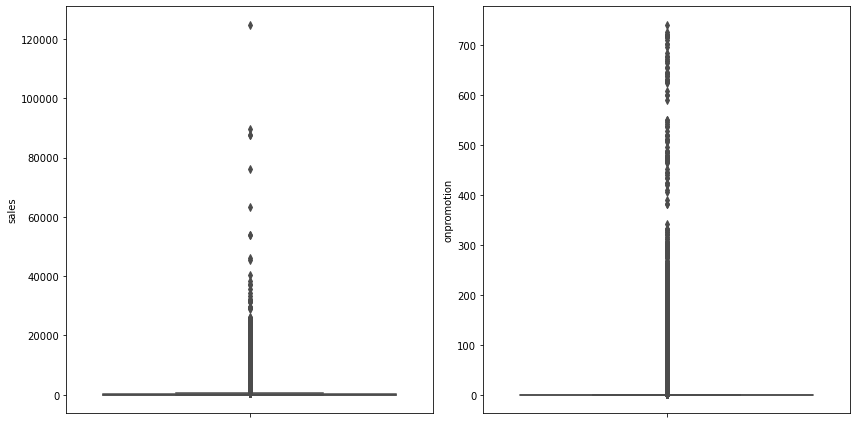

In [52]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset4[features[i]], color='cyan')
    plt.tight_layout()

From the univariate analysis, we can know that there's a lot of outliers on variables "Sales" and "Onpromotion". Therefore, will use clipping method in specified threshold.

In [53]:
#Check Quantile in Each Variables
dataset4[numerical2].quantile([0.975, .05], axis = 0)

,sales,onpromotion
0.975,3375.0,30.0
0.050,0.0,0.0


In [54]:
#Cliping Numerical Data using quantile of 97,5% percentile
dataset4['sales'] = dataset4['sales'].clip(0, 3375, axis = 0)
dataset4['onpromotion'] = dataset4['sales'].clip(0, 30, axis = 0)
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,3
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,3
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,3
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,3
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,3


In [55]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027618 entries, 0 to 3027617
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   date              object 
 2   store_nbr         int64  
 3   family            object 
 4   sales             float64
 5   onpromotion       float64
 6   city              object 
 7   state             object 
 8   cluster           int64  
 9   day_type          object 
 10  description       object 
 11  dcoilwtico        float64
 12  family_encoding   int32  
 13  city_encoding     int32  
 14  daytype_encoding  int32  
dtypes: float64(3), int32(3), int64(3), object(6)
memory usage: 334.9+ MB


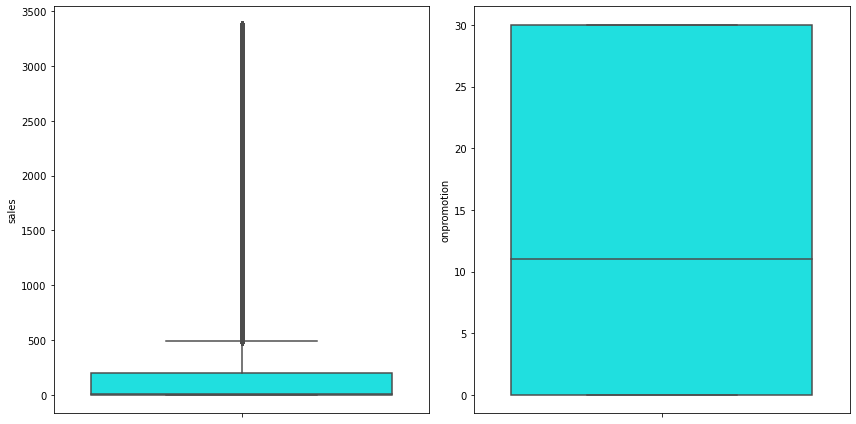

In [56]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset4[features[i]], color='cyan')
    plt.tight_layout()

Observation :

After clipping upper limit of the sales and onpromotion using 97,5% percentile, it's finally not have any ouliers. Except the sales, it still have line avter the max value, therefore need to cliping the upper limit of sales

In [57]:
#Cliping Numerical Data od "Sales" using quantile of 97,5% percentile
dataset4['sales'] = dataset4['sales'].clip(0, 490, axis = 0)
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,3
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,3
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,3
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,3
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,3


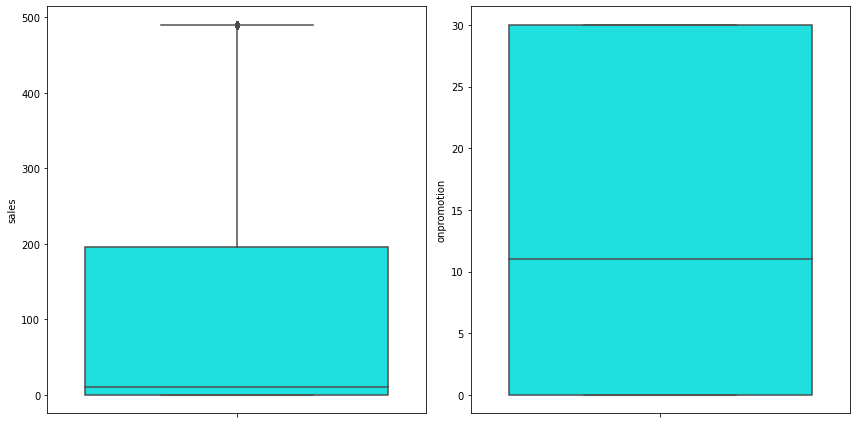

In [58]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical2
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dataset4[features[i]], color='cyan')
    plt.tight_layout()

In [59]:
# Re-check numerical statistical sumary
dataset4[numerical2].describe()

,sales,onpromotion
count,3.027618e+06,3.027618e+06
mean,1.229670e+02,1.478100e+01
std,1.823203e+02,1.377946e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.100000e+01,1.100000e+01
75%,1.957038e+02,3.000000e+01
max,4.900000e+02,3.000000e+01


Dataset is ready to use in **modelling**




## Draw correlation plot on training data and perform feature selection on highly correlated features

In [61]:
#define X and Y to define multicolinearity
X = dataset4[['city_encoding', 'store_nbr', 'family_encoding', 'onpromotion',  'cluster', 'daytype_encoding', 'dcoilwtico']]
y = dataset4[['sales']]

In [62]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,city_encoding,1.120232
2,store_nbr,1.114027
3,family_encoding,1.000059
4,onpromotion,1.018812
5,cluster,1.010473
6,daytype_encoding,1.002044
7,dcoilwtico,1.019104


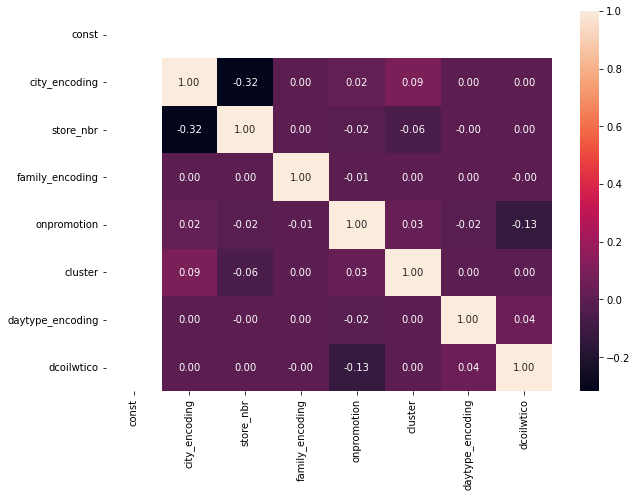

In [63]:
# Recalculate heatmap correlation
sales = pd.concat([X, y], axis=1)
corr = X.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

From heatmap & VIF score, we know that there's no significant correlation between variables, which is good. Therefore, can continue to anothe step.


### Split Data

#### Preparing pretrain data and test data (80% vs 20% )

In [64]:
dataset4.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,cluster,day_type,description,dcoilwtico,family_encoding,city_encoding,daytype_encoding
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,0,18,3
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,1,18,3
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,2,18,3
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,3,18,3
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,13,Holiday,Primer dia del ano,68.196033,4,18,3


In [65]:
# split train test
from sklearn.model_selection import train_test_split

X = dataset4[['city_encoding','store_nbr', 'family_encoding', 'onpromotion', 'cluster', 'daytype_encoding', 'dcoilwtico']]
y = dataset4[['sales']]

X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Split data success!

### Scalling

In [69]:
#define numerical continous data for scalling
num_train = X_pretrain[['dcoilwtico', 'onpromotion']]
num_test = X_test[['dcoilwtico', 'onpromotion']]

#define categorical data for 
var_cat_train = X_pretrain[['city_encoding', 'store_nbr', 'family_encoding', 'cluster', 'daytype_encoding']]
var_cat_test = X_test[['city_encoding','store_nbr', 'family_encoding','cluster', 'daytype_encoding']]

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(num_train)
scaled_Xtest = scaler.transform(num_test)

In [71]:
#Scalling Xtrain to dataframe
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index()

#Scalling Xtest to dataframe
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index()

In [72]:
cat_train = var_cat_train.reset_index()
cat_test = var_cat_test.reset_index()

In [73]:
cat_train

,index,city_encoding,store_nbr,family_encoding,cluster,daytype_encoding
0,408722,21,16,17,3,4
1,1110986,4,27,8,1,4
2,898189,8,24,28,1,4
3,2181784,18,44,22,5,4
4,1797506,3,39,29,6,3
...,...,...,...,...,...,...
2422089,1692743,3,37,8,2,4
2422090,2356330,18,48,31,14,4
2422091,2229084,18,45,0,11,4
2422092,2768307,5,54,3,3,4


In [74]:
scaled_Xtrain

,index,0,1
0,0,-0.000386,-1.072565
1,1,-1.059496,1.104463
2,2,-0.000386,1.104463
3,3,-0.000386,1.104463
4,4,1.079252,1.104463
...,...,...,...
2422089,2422089,1.163620,1.104463
2422090,2422090,1.300485,-1.072565
2422091,2422091,-1.007937,-0.129186
2422092,2422092,1.090032,1.104463


In [75]:
#merging dataset (use concat)
X_pretrain = pd.concat([scaled_Xtrain,cat_train],axis=1)
X_test = pd.concat([scaled_Xtest,cat_test],axis=1)

In [76]:
X_pretrain = X_pretrain.drop(['index','index'],axis=1)
X_test = X_test.drop(['index','index'],axis=1)

In [77]:
X_pretrain

,0,1,city_encoding,store_nbr,family_encoding,cluster,daytype_encoding
0,-0.000386,-1.072565,21,16,17,3,4
1,-1.059496,1.104463,4,27,8,1,4
2,-0.000386,1.104463,8,24,28,1,4
3,-0.000386,1.104463,18,44,22,5,4
4,1.079252,1.104463,3,39,29,6,3
...,...,...,...,...,...,...,...
2422089,1.163620,1.104463,3,37,8,2,4
2422090,1.300485,-1.072565,18,48,31,14,4
2422091,-1.007937,-0.129186,18,45,0,11,4
2422092,1.090032,1.104463,5,54,3,3,4


In [78]:
#rename column 0 = dcoilwtico
X_pretrain.rename(columns={0:'dcoilwtico'},inplace=True)
X_test.rename(columns={0:'dcoilwtico'},inplace=True)

#rename column 1 = onpromotion
X_pretrain.rename(columns={1:'onpromotion'},inplace=True)
X_test.rename(columns={1:'onpromotion'},inplace=True)

In [79]:
X_test

,dcoilwtico,onpromotion,city_encoding,store_nbr,family_encoding,cluster,daytype_encoding
0,-0.670462,1.104463,18,49,6,11,4
1,1.725141,1.104463,18,47,24,14,4
2,-0.956847,1.104463,10,13,30,15,4
3,1.593432,-1.072565,17,33,1,3,4
4,-1.009344,-1.072565,18,44,1,5,4
...,...,...,...,...,...,...,...
605519,1.365637,-0.346889,9,15,13,15,3
605520,-0.000386,1.104463,8,26,29,10,0
605521,1.634211,-1.072565,10,13,17,15,4
605522,-0.881384,1.104463,8,32,7,3,4


#### Preparing train data and validate data (80% vs 20%)

In [80]:
X_train, X_validate, y_train, y_validate = train_test_split(X_pretrain, y_pretrain, test_size=0.20, random_state=42)

Split data success!

## Choose the appropriate metric for fitting the model using Hyperparameter Tuning

### Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3,5,10],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5,10,15]}
rf_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [83]:
rf_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15]},
             return_train_score=True)

In [84]:
# Cek skor dan params terbaik
print('Random Forest')
print('Best_score:', rf_search.best_score_)
print('Best_params:', rf_search.best_params_)

Random Forest
Best_score: 0.9158297798891241
Best_params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 15}


Observation:

The best alpha parameters for Random Forest is max_depth: 10, min_samples_feal :4, min_samples_split :2, n_estimators: 15, because have the lowest error

## Train any classification model you’d prefer

### Random Forest

#### Train Any Classification using Train Data

In [85]:
rf_model = RandomForestRegressor(
                max_depth = 10,
                min_samples_leaf = 4,
                min_samples_split = 2,
                n_estimators = 15,
                random_state = 42
                )

In [86]:
#Fit Model
rf_model.fit(X_train,y_train)

C:\Users\userPC\AppData\Local\Temp/ipykernel_5604/2939887170.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=15,
                      random_state=42)

In [87]:
#train model
y_pred_rf_train = rf_model.predict(X_train)

In [90]:
#Evaluation Model on Training Data
print('MAE Random Forest for training data is {}'.format(mean_absolute_error(y_train, y_pred_rf_train)))
print('RMSE Random Forest for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_rf_train))))
print('R-squared for training data is {}'.format(r2_score(y_train, y_pred_rf_train)))

MAE Random Forest for training data is 21.901894670598093
RMSE Random Forest for training data is 52.90011005902
R-squared for training data is 0.9157941422203046


From the result, we know that train data :

*   the spread of residuals from Random Forest is 21.901894670598093
*   mean absolute error of actual data to Random Forest is 52.90011005902
*   R squared for training data in Random Forest is 0.9157941422203046, therefore 91,579% of variables can explain the amount of sales (dependent variables). And, another 8,421% explain by others variables.

#### Train Any Classification using Validation Data

In [91]:
#Fit Model
rf_model.fit(X_validate,y_validate)

C:\Users\userPC\AppData\Local\Temp/ipykernel_5604/2419676566.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_validate,y_validate)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=15,
                      random_state=42)

In [92]:
#train model
y_pred_rf_validate = rf_model.predict(X_validate)

In [94]:
#Evaluation Model on Training Data
print('MAE Random Forest for validate data is {}'.format(mean_absolute_error(y_validate, y_pred_rf_validate)))
print('RMSE Random Forest for validate data is {}'.format(np.sqrt(mean_squared_error(y_validate, y_pred_rf_validate))))
print('R-squared for validate data is {}'.format(r2_score(y_validate, y_pred_rf_validate)))

MAE Random Forest for validate data is 21.717404174510616
RMSE Random Forest for validate data is 52.2913940093935
R-squared for validate data is 0.9177262316983521


From the result, we know that validate data :

*   the spread of residuals from Random Forest is 21.717404174510616
*   mean absolute error of actual data to Random Forest is 52.2913940093935
*   R squared for training data in Random Forest is 0.9177262316983521, therefore 91,772% of variables can explain the amount of sales (dependent variables). And, another 8,228% explain by others variables.

## Evaluate the Model on Test Data

In [95]:
rf_model.fit(X_test,y_test)

C:\Users\userPC\AppData\Local\Temp/ipykernel_5604/2376727247.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_test,y_test)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=15,
                      random_state=42)

In [96]:
#Prediction for data testing
y_pred_rf = rf_model.predict(X_test)

In [97]:
#Evaluating Model
print('RMSE Random Forest for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print('MAE Random Forest for testing data is {}'.format(mean_absolute_error(y_test, y_pred_rf)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_pred_rf)))

RMSE Random Forest for testing data is 53.2645830935193
MAE Random Forest for testing data is 22.22366294715687
R-squared for test data is 0.9147226184698004


Before, we know that train data :
*   the spread of residuals from Random Forest is 21.901894670598093
*   mean absolute error of actual data to Random Forest is 52.90011005902
*   R squared for training data in Random Forest is 0.9157941422203046, therefore 91,579% of variables can explain the amount of sales (dependent variables). And, another 8,421% explain by others variables.

But from the result of test data :
*   the spread of residuals from Random Forest is 53.2645830935193
*   mean absolute error of actual data to Random Forest is 22.22366294715687
*   R squared for training data in Random Forest is 0.9147226184698004, therefore 91,472% of variables can explain the amount of sales (dependent variables). And, another 8,528% explain by others variables.

From the result, we can know that there's no significant different in train data, validate data, test data in RMSE, and MAE. But, the R-squared there's no significant difference.

## Feature Importance

### Random Forest

In [98]:
rf_model.feature_importances_

array([3.68639982e-03, 6.64052640e-01, 5.57420315e-03, 4.85032900e-02,
       2.63420684e-01, 1.45451905e-02, 2.17592263e-04])

In [99]:
sort = rf_model.feature_importances_.argsort()

Text(0.5, 0, 'Feature Importance')

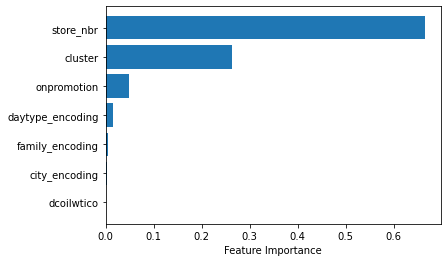

In [101]:
plt.barh(X.columns[sort], rf_model.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [100]:
#Evaluating Model
print('RMSE Random Forest for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print('MAE Random Forest for testing data is {}'.format(mean_absolute_error(y_test, y_pred_rf)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_pred_rf)))

RMSE Random Forest for testing data is 53.2645830935193
MAE Random Forest for testing data is 22.22366294715687
R-squared for test data is 0.9147226184698004


# Business Solution (Conclusion)



1.   Using ridge regression (because has minim error than lasso regression) for modelling machine learning to test in production
2.   Efficiency process of delivery/ allocation of product to reduce cost.
3. R&D of new product or enhance the innovation of product
4. Increase activity of digital marketing to increase awareness and soft marketing to engage with customersor prospective buyers

